<a href="https://colab.research.google.com/github/tomektom10/dataScienceBootCamp/blob/main/sie%C4%87neuronowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [300]:
import pandas as pd
#df = pd.read_excel("dane-brent-uun24-dec24-15-min.xlsx",sheet_name="BRENT GODZINNY")
df = pd.read_csv("dane-brent-uun24-dec24-15-min.csv",sep=";")
df
df.columns
import numpy as np
import calendar
import datetime
import matplotlib.pyplot as plt


In [301]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [302]:
df

,Timestamp,Open,High,Low,Close,SMA (30),SMA (15)
0,07.12.2023 19:15,"1,01","1,05","1,01","1,03","1,12","1,08"
1,07.12.2023 19:30,"1,03","1,07","1,03","1,07","1,12","1,07"
2,07.12.2023 19:45,"1,07","1,07","1,03","1,04","1,12","1,06"
3,07.12.2023 20:00,"1,03","1,05","1,01","1,02","1,11","1,06"
4,07.12.2023 20:15,"1,03","1,06","0,98","1,03","1,11","1,05"
...,...,...,...,...,...,...,...
567,18.12.2023 18:45,NaN,NaN,NaN,NaN,NaN,NaN
568,18.12.2023 19:00,NaN,NaN,NaN,NaN,NaN,NaN
569,18.12.2023 19:15,NaN,NaN,NaN,NaN,NaN,NaN
570,18.12.2023 19:30,NaN,NaN,NaN,NaN,NaN,NaN


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  572 non-null    object
 1   Open       567 non-null    object
 2   High       567 non-null    object
 3   Low        567 non-null    object
 4   Close      567 non-null    object
 5   SMA (30)   567 non-null    object
 6   SMA (15)   567 non-null    object
dtypes: object(7)
memory usage: 31.4+ KB


In [304]:
df = df.dropna()

In [305]:
df["Close"] = df["Close"].str.replace(",", ".").astype(float)

<ipython-input-305-dbd163b9d827>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Close"] = df["Close"].str.replace(",", ".").astype(float)


In [306]:
df

,Timestamp,Open,High,Low,Close,SMA (30),SMA (15)
0,07.12.2023 19:15,"1,01","1,05","1,01",1.03,"1,12","1,08"
1,07.12.2023 19:30,"1,03","1,07","1,03",1.07,"1,12","1,07"
2,07.12.2023 19:45,"1,07","1,07","1,03",1.04,"1,12","1,06"
3,07.12.2023 20:00,"1,03","1,05","1,01",1.02,"1,11","1,06"
4,07.12.2023 20:15,"1,03","1,06","0,98",1.03,"1,11","1,05"
...,...,...,...,...,...,...,...
562,18.12.2023 17:30,"1,22","1,26","1,21",1.21,"1,15","1,23"
563,18.12.2023 17:45,"1,21","1,22","1,17",1.20,"1,15","1,23"
564,18.12.2023 18:00,"1,21","1,26","1,21",1.24,"1,16","1,23"
565,18.12.2023 18:15,"1,23","1,27","1,23",1.27,"1,17","1,23"


In [307]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [308]:
windows_size = 5
split_point = 0.9
split_point_nb = int(split_point * len(df))

In [309]:
#skalowanie do sieci nauronowych

In [310]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [311]:
trein,test = scaled_data[0:split_point_nb], scaled_data[split_point_nb:]

In [312]:
def generuj_okienka(data, windows_size):
  windows = []
  y = []
  for i in range(len(data) -windows_size):
    window = data[i:i+windows_size]
    windows.append(window)
    y.append(data[i+windows_size])
  return np.array(windows),np.array(y)



In [313]:
x_train, y_train = generuj_okienka(trein, windows_size)

In [314]:
x_test, y_test = generuj_okienka(test, windows_size)

In [315]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [316]:
#ARCHITEKTURA SIECI TU MOGE MODYFOKOWAC moge zwiekszyc LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(windows_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [317]:
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 3s 43ms/step - loss: 0.3537 - val_loss: 0.3158
Epoch 2/100
13/13 [==============================] - 0s 10ms/step - loss: 0.2331 - val_loss: 0.1880
Epoch 3/100
13/13 [==============================] - 0s 10ms/step - loss: 0.1230 - val_loss: 0.0631
Epoch 4/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0330 - val_loss: 0.0021
Epoch 5/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0157 - val_loss: 0.0019
Epoch 6/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0097 - val_loss: 0.0035
Epoch 7/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0061 - val_loss: 0.0019
Epoch 8/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0039 - val_loss: 0.0027
Epoch 9/100
13/13 [==============================] - 0s 13ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 10/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0026 - val_loss: 0.0023

In [318]:
predictions = model.predict(x_test)


2/2 [==============================] - 0s 5ms/step


In [319]:
predictions_real = scaler.inverse_transform(predictions)

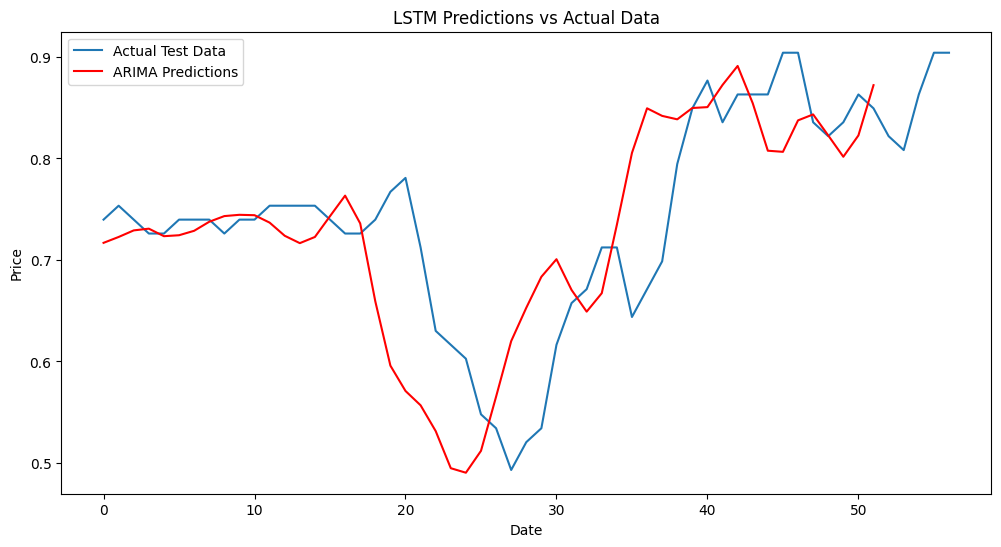

In [320]:
# Plotting the results
plt.figure(figsize=(12, 6))
#plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(predictions, label='ARIMA Predictions', color='red')
plt.title('LSTM Predictions vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [321]:
predictions = model.predict(x_test)

2/2 [==============================] - 0s 5ms/step


In [322]:
x_test[0]

array([[0.73972603],
       [0.75342466],
       [0.73972603],
       [0.7260274 ],
       [0.7260274 ]])

In [323]:
from sklearn.metrics import mean_squared_error

In [324]:
mse = mean_squared_error(y_test, predictions)

In [325]:
mse

0.002298080353222798

In [326]:
#MSE 10 window = 0.0023883501780096184
 #     15 = 0.0034732914563747044
 # 5 = 0.002798899567247003

In [ ]:
lista_ostatnich_cen = [1.25, 1.26, 1.22, 1.21, 1.15]

In [327]:
def zrob_predykcje(model, lista_ostatnich_cen, scaler):
  scaled_data_do_przewidywania = scaler.fit_transform(np.array(lista_ostatnich_cen).reshape(-1,1))
  predykcja_ceny = model.predict(np.array([scaled_data_do_przewidywania]))
  predykcja_ceny_real = scaler.inverse_transform(list(predictions[0].reshape(1,-1)))
  return predykcja_ceny_real

In [328]:
lista_ostatnich_cen = [1.25, 1.26, 1.22, 1.21, 1.15]

In [329]:
przewidywanie = zrob_predykcje(model, lista_ostatnich_cen, scaler)

1/1 [==============================] - 0s 32ms/step


In [330]:
przewidywanie

array([[1.22885455]])

In [331]:
scaled_data_do_przewidywania = scaler.fit_transform(np.array(dane_do_przewidywania).reshape(-1,1))

In [332]:
np.array([scaled_data_do_przewidywania]).shape

(1, 5, 1)

In [333]:
predykcja_ceny = model.predict(np.array([scaled_data_do_przewidywania]))

1/1 [==============================] - 0s 34ms/step


In [334]:
predykcja_ceny[0][0]

0.7533171

In [335]:
predykcja_ceny_real = scaler.inverse_transform(list(predictions[0].reshape(1,-1)))

In [336]:
predykcja_ceny_real

array([[1.23018017]])